# Dataset Description
From a list of restaurants and their respective sales, this data set ranks the restaurants from best to worst in terms of their sales and the types of food they offer.

In [1]:
# Data analysis and data preparation
import pandas as pd
import numpy as np
import random as rnd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Use pd.read_csv for the top250.csv that was downloaded.
restaurants_df = pd.read_csv('data/top250.csv')

# Exploring the Dataset
Display the dataset's contents to inspect the kind of data being dealt with.

In [3]:
# Display the first 5 rows, using head, of the restaurants dataframe
restaurants_df.head()

,Rank,Restaurant,Content,Sales,YOY_Sales,Units,YOY_Units,Headquarters,Segment_Category
0,1,McDonald's,NaN,40412,4.9%,13846,-0.5%,NaN,Quick Service & Burger
1,2,Starbucks,NaN,21380,8.6%,15049,3.0%,NaN,Quick Service & Coffee Cafe
2,3,Chick-fil-A,While Popeyes got a lot of the chicken buzz in...,11320,13.0%,2470,5.0%,NaN,Quick Service & Chicken
3,4,Taco Bell,NaN,11293,9.0%,6766,2.7%,NaN,Quick Service & Mexican
4,5,Burger King,NaN,10204,2.7%,7346,0.2%,NaN,Quick Service & Burger


In [4]:
# Display the last 5 rows, using tail, of the restaurants dataframe
restaurants_df.tail()

,Rank,Restaurant,Content,Sales,YOY_Sales,Units,YOY_Units,Headquarters,Segment_Category
245,246,Rainforest Cafe,NaN,129,-10.4%,18,-5.3%,NaN,Varied Menu
246,247,PDQ,NaN,127,-5.5%,56,-11.1%,NaN,Chicken
247,248,Lupe Tortilla,NaN,127,12.1%,25,8.7%,NaN,Mexican
248,249,Cook-Out Restaurant,NaN,126,10.1%,270,7.1%,NaN,Burger
249,250,Jollibee,NaN,126,15.2%,40,11.1%,NaN,Chicken


In [5]:
# Display the shape of the data (display row and column number)
restaurants_df.shape

(250, 9)

In [6]:
# Display the names of the columns
restaurants_df.columns

Index(['Rank', 'Restaurant', 'Content', 'Sales', 'YOY_Sales', 'Units',
       'YOY_Units', 'Headquarters', 'Segment_Category'],
      dtype='object')

In [7]:
# Display the number of unique values
restaurants_df.nunique()

Rank                250
Restaurant          250
Content              33
Sales               203
YOY_Sales           172
Units               214
YOY_Units           140
Headquarters         39
Segment_Category     48
dtype: int64

# Data Preparation
Clean the data based on what we want to find out about the data. Remove any outliers, null values, or unnecessary columns to make the data tidy.

In [8]:
# Display the total number of null values present in the data

restaurants_df.isnull().sum()

Rank                  0
Restaurant            0
Content             217
Sales                 0
YOY_Sales             0
Units                 0
YOY_Units             0
Headquarters        198
Segment_Category      0
dtype: int64

Since the information included in the Content column are general descriptions of the restaurants, these will not be used for data analysis later on. the Headquarters for each restaurant hold little significance to data analysis as well. Additionally, since these two columns also contain null values these can be removed.

In [9]:
# Remove the content and headquarters columns

restau_df = restaurants_df.drop(['Content', 'Headquarters'], axis=1)

# TODO
# Display the first 25 rows of the new dataframe

restau_df.head(25)

,Rank,Restaurant,Sales,YOY_Sales,Units,YOY_Units,Segment_Category
0,1,McDonald's,40412,4.9%,13846,-0.5%,Quick Service & Burger
1,2,Starbucks,21380,8.6%,15049,3.0%,Quick Service & Coffee Cafe
2,3,Chick-fil-A,11320,13.0%,2470,5.0%,Quick Service & Chicken
3,4,Taco Bell,11293,9.0%,6766,2.7%,Quick Service & Mexican
4,5,Burger King,10204,2.7%,7346,0.2%,Quick Service & Burger
5,6,Subway,10200,-2.0%,23801,-4.0%,Quick Service & Sandwich
6,7,Wendy's,9762,4.2%,5852,0.7%,Quick Service & Burger
7,8,Dunkin',9228,5.0%,9630,2.2%,Quick Service & Coffee Cafe
8,9,Domino's,7044,6.9%,6126,4.3%,Quick Service & Pizza
9,10,Panera Bread,5890,4.0%,2160,3.2%,Fast Casual & Bakery Cafe


In [10]:
# Display the unique values of column Segment_Category

restau_df['Segment_Category'].unique()

array(['Quick Service & Burger', 'Quick Service & Coffee Cafe',
       'Quick Service & Chicken', 'Quick Service & Mexican',
       'Quick Service & Sandwich', 'Quick Service & Pizza',
       'Fast Casual & Bakery Cafe', 'Fast Casual & Mexican',
       'Casual Dining & Italian/Pizza', 'Casual Dining & Varied Menu',
       'Fast Casual & Asian/Noodle', 'Quick Service & Frozen Desserts',
       'Casual Dining & Sports Bar', 'Family Dining & Family Style',
       'Casual Dining & Steak', 'Casual Dining & Seafood',
       'Fast Casual & Sandwich', 'Fast Casual & Chicken',
       'Quick Service & Family Casual', 'Fast Casual & Burger',
       'Casual Dining & Asian', 'Quick Service & Snack', 'Steak',
       'Quick Service & Beverage', 'Sports Bar',
       'Quick Service & Seafood', 'Quick Service & Bakery Cafe',
       'Fast Casual & Pizza', 'Fine Dining & Steak', 'Mexican',
       'Varied Menu', 'Chicken', 'Italian/Pizza', 'Pizza', 'Seafood',
       'Frozen Desserts', 'Coffee Cafe', 'BBQ',

It can be seen from the resulting array that there are entries in the Segment_Category column which contain compound categories. To further tidy the dataset, the Segment_Category can be split into two.

In [11]:
rest_df = restau_df
temp = rest_df["Segment_Category"].str.split("& ", n = 1, expand = True)
rest_df["Segment_Category_1"] = temp[0]
rest_df["Segment_Category_2"] = temp[1]

restau_df = restau_df.drop(['Segment_Category_1', 'Segment_Category_2'], axis = 1)

rest_df = rest_df.drop(['Segment_Category'], axis = 1)

### Display Tidied Dataset for Top250.csv

In [12]:
rest_df.head(50)

,Rank,Restaurant,Sales,YOY_Sales,Units,YOY_Units,Segment_Category_1,Segment_Category_2
0,1,McDonald's,40412,4.9%,13846,-0.5%,Quick Service,Burger
1,2,Starbucks,21380,8.6%,15049,3.0%,Quick Service,Coffee Cafe
2,3,Chick-fil-A,11320,13.0%,2470,5.0%,Quick Service,Chicken
3,4,Taco Bell,11293,9.0%,6766,2.7%,Quick Service,Mexican
4,5,Burger King,10204,2.7%,7346,0.2%,Quick Service,Burger
5,6,Subway,10200,-2.0%,23801,-4.0%,Quick Service,Sandwich
6,7,Wendy's,9762,4.2%,5852,0.7%,Quick Service,Burger
7,8,Dunkin',9228,5.0%,9630,2.2%,Quick Service,Coffee Cafe
8,9,Domino's,7044,6.9%,6126,4.3%,Quick Service,Pizza
9,10,Panera Bread,5890,4.0%,2160,3.2%,Fast Casual,Bakery Cafe


# Data Analysis
This section observations and analyses regarding the explored dataset.

### Statistics
View the statistical analysis of the current dataframe. Measure the mean, the standard deviation, and the minimum and maximum values of the sales of the restaurants included in the dataframe.

In [13]:
# Describe the Sales column of the restaurants_df dataframe to display its statistics
rest_df['Sales'].describe()

count      250.00000
mean      1242.74000
std       3365.22882
min        126.00000
25%        181.00000
50%        330.00000
75%        724.75000
max      40412.00000
Name: Sales, dtype: float64

In [14]:
# Display rows in the dataset wherein the Sales amount starts becoming less than the mean
rest_df.loc[46:]

,Rank,Restaurant,Sales,YOY_Sales,Units,YOY_Units,Segment_Category_1,Segment_Category_2
46,47,Bojangles',1331,2.7%,746,-1.3%,Quick Service,Chicken
47,48,BJ's Restaurant & Brewhouse,1161,4.0%,208,3.0%,Casual Dining,Varied Menu
48,49,TGI Fridays,1085,-8.5%,385,-7.9%,Casual Dining,Varied Menu
49,50,In-N-Out Burger,957,4.6%,351,3.5%,Quick Service,Burger
50,51,Steak 'n Shake,950,-7.7%,576,-3.0%,Quick Service,Burger
...,...,...,...,...,...,...,...,...
245,246,Rainforest Cafe,129,-10.4%,18,-5.3%,Varied Menu,None
246,247,PDQ,127,-5.5%,56,-11.1%,Chicken,None
247,248,Lupe Tortilla,127,12.1%,25,8.7%,Mexican,None
248,249,Cook-Out Restaurant,126,10.1%,270,7.1%,Burger,None


Due to the significant difference between the maximum and minimum values of the Sales in the dataset, less than a fifth of all the restaurants in the top 250 list meet the mean of all the Sales. Starting from Rank 48, the restaurants are below average in terms of sales. This is further evidenced by a high standard deviation with a value of 3365.22882.

Compared to the middle performing restaurants, those which are highly ranked seem to find great success.

To find a reasoning behind the success of these restaurants found in the Top 250 list, the following kernel counts the number of restaurants which are classified in the different unique categories in the columns Segment_Category_1 and Segment_Category_2.

In [15]:
a = rest_df['Segment_Category_1'].value_counts()
b = rest_df['Segment_Category_2'].value_counts()
a.add(b, fill_value = 0).sort_values(ascending = False)
a.head(27)

Quick Service      47
Casual Dining      23
Varied Menu        22
Fast Casual        21
Mexican            14
Italian/Pizza      10
Burger             10
Family Style       10
Steak               9
Pizza               9
Bakery Cafe         8
Seafood             8
Sandwich            7
Chicken             7
Family Dining       7
BBQ                 7
Sports Bar          6
Frozen Desserts     4
Family Casual       4
Coffee Cafe         4
Snack               4
Asian               3
Asian/Noodle        3
Ethnic              1
Healthy             1
Fine Dining         1
Name: Segment_Category_1, dtype: int64

Based on the results of the previous operation, the type of service offered in a restaurant holds significant effect in its success. It can be seen that 47 restaurants, almost a fifth of the population, are categorized under Quick Service. This shows that a preference people have in choosing their restaurants is to go to those which take up less of their time. (Other types of services include Casual Dining, Fast Casual, Family Dining, and Family Casual)

In addition to the type of service, the type of food offered in a restaurant also seems to be a factor in determining its success. Most people prefer restaurants which cater to a wide variety of dishes as evidenced by 22 restaurants in the Top 250 list having varied menus. 

Moreover, specific cuisine such as Mexican and Italian food also seem to appeal to more people. As well as certain products wuch as burgers, steaks, and pizza.

On the other hand, people tend to avoid restaurants which offer healthy and ethnic food. The category of Fine Dining is also not widely popular which is likely due to its costly extravagance.

### Analyzing the effect of the type of service to a restaurant's success
To further analyze the types of services previously mentioned, the following section focuses on the well-received types shown in the kernel before.

In [16]:
is_quickService = rest_df.Segment_Category_1.str.contains("Quick Service")
rest_df[is_quickService]

,Rank,Restaurant,Sales,YOY_Sales,Units,YOY_Units,Segment_Category_1,Segment_Category_2
0,1,McDonald's,40412,4.9%,13846,-0.5%,Quick Service,Burger
1,2,Starbucks,21380,8.6%,15049,3.0%,Quick Service,Coffee Cafe
2,3,Chick-fil-A,11320,13.0%,2470,5.0%,Quick Service,Chicken
3,4,Taco Bell,11293,9.0%,6766,2.7%,Quick Service,Mexican
4,5,Burger King,10204,2.7%,7346,0.2%,Quick Service,Burger
5,6,Subway,10200,-2.0%,23801,-4.0%,Quick Service,Sandwich
6,7,Wendy's,9762,4.2%,5852,0.7%,Quick Service,Burger
7,8,Dunkin',9228,5.0%,9630,2.2%,Quick Service,Coffee Cafe
8,9,Domino's,7044,6.9%,6126,4.3%,Quick Service,Pizza
10,11,Pizza Hut,5558,0.6%,7306,-2.4%,Quick Service,Pizza


In [17]:
is_fastCasual = rest_df.Segment_Category_1.str.contains("Fast Casual")
rest_df[is_fastCasual]

,Rank,Restaurant,Sales,YOY_Sales,Units,YOY_Units,Segment_Category_1,Segment_Category_2
9,10,Panera Bread,5890,4.0%,2160,3.2%,Fast Casual,Bakery Cafe
11,12,Chipotle Mexican Grill,5509,14.8%,2584,5.3%,Fast Casual,Mexican
16,17,Panda Express,3946,12.0%,2209,4.9%,Fast Casual,Asian/Noodle
33,34,Jimmy John's Gourmet Sandwiches,2105,-1.6%,2787,-0.5%,Fast Casual,Sandwich
35,36,Zaxby's,1886,6.0%,910,1.3%,Fast Casual,Chicken
39,40,Five Guys Burgers and Fries,1661,7.4%,1368,0.7%,Fast Casual,Burger
41,42,Raising Cane's Chicken Fingers,1466,23.8%,457,14.3%,Fast Casual,Chicken
43,44,Wingstop,1363,19.0%,1231,9.5%,Fast Casual,Chicken
45,46,Jersey Mike's Subs,1340,16.7%,1667,11.6%,Fast Casual,Sandwich
52,53,Qdoba Mexican Eats,901,5.9%,730,-2.9%,Fast Casual,Mexican


Judging from the rankings of the restaurants under Quick Service and Fast Casual, the speed at which customers are served is a necessary factor in a restaurant's success. The top 14 in the list are classified under one of these two categories.

In [18]:
is_casualDining = rest_df.Segment_Category_1.str.contains("Casual Dining")
rest_df[is_casualDining]

,Rank,Restaurant,Sales,YOY_Sales,Units,YOY_Units,Segment_Category_1,Segment_Category_2
14,15,Olive Garden,4287,5.0%,866,1.3%,Casual Dining,Italian/Pizza
15,16,Applebee's,4085,-3.0%,1665,-1.7%,Casual Dining,Varied Menu
21,22,Buffalo Wild Wings,3669,-0.1%,1206,-0.2%,Casual Dining,Sports Bar
22,23,Chili's Grill & Bar,3563,2.2%,1242,-0.7%,Casual Dining,Varied Menu
25,26,Texas Roadhouse,3016,11.0%,553,3.8%,Casual Dining,Steak
28,29,Outback Steakhouse,2635,0.9%,724,-1.2%,Casual Dining,Steak
30,31,Red Lobster,2490,1.6%,679,0.1%,Casual Dining,Seafood
32,33,The Cheesecake Factory,2180,2.5%,206,2.5%,Casual Dining,Varied Menu
36,37,LongHorn Steakhouse,1867,6.3%,530,1.9%,Casual Dining,Steak
40,41,Red Robin Gourmet Burgers and Brews,1548,-0.3%,556,-3.0%,Casual Dining,Varied Menu


Although not as successful as those classified under Quick Service and Fast Casual, restaurants categorized as offering Casual Dining also seem widely popular to the masses with multiple restaurant names making it to the top 100 of the list.

In [19]:
is_familyDining = rest_df.Segment_Category_1.str.contains("Family Dining")
rest_df[is_familyDining]

,Rank,Restaurant,Sales,YOY_Sales,Units,YOY_Units,Segment_Category_1,Segment_Category_2
24,25,IHOP,3266,2.0%,1710,0.3%,Family Dining,Family Style
26,27,Denny's,2691,1.1%,1558,-1.5%,Family Dining,Family Style
31,32,Cracker Barrel,2482,1.8%,660,0.8%,Family Dining,Family Style
44,45,Waffle House,1344,3.4%,1959,1.2%,Family Dining,Family Style
58,59,Bob Evans,795,-4.2%,483,-1.4%,Family Dining,Family Style
81,82,First Watch,558,35.1%,368,24.7%,Family Dining,Family Style
82,83,Perkins Restaurant & Bakery,541,-9.5%,309,-13.0%,Family Dining,Family Style


### Analyzing the relationship between year-over-year data/number of units and a restaurant's rank
This sections attempts to find a correlation between YOY_Sales/Units/YOY_Units and Rank.

In [20]:
rest_df.sort_values(['YOY_Sales', 'Rank'])

,Rank,Restaurant,Sales,YOY_Sales,Units,YOY_Units,Segment_Category_1,Segment_Category_2
21,22,Buffalo Wild Wings,3669,-0.1%,1206,-0.2%,Casual Dining,Sports Bar
157,158,Rubio's,232,-0.1%,197,-3.4%,Mexican,None
40,41,Red Robin Gourmet Burgers and Brews,1548,-0.3%,556,-3.0%,Casual Dining,Varied Menu
94,95,Mellow Mushroom,461,-0.3%,187,-1.1%,Casual Dining,Italian/Pizza
108,109,Chuck E. Cheese's,381,-0.5%,537,1.3%,Pizza,None
...,...,...,...,...,...,...,...,...
3,4,Taco Bell,11293,9.0%,6766,2.7%,Quick Service,Mexican
232,233,Nobu,139,9.4%,17,13.3%,Asian,None
154,155,Mastro's Restaurants,242,9.7%,18,5.9%,Steak,None
133,134,Jack's,290,9.8%,176,8.6%,Burger,None


In [21]:
rest_df.sort_values(['Units', 'Rank'], ascending = False)

,Rank,Restaurant,Sales,YOY_Sales,Units,YOY_Units,Segment_Category_1,Segment_Category_2
5,6,Subway,10200,-2.0%,23801,-4.0%,Quick Service,Sandwich
1,2,Starbucks,21380,8.6%,15049,3.0%,Quick Service,Coffee Cafe
0,1,McDonald's,40412,4.9%,13846,-0.5%,Quick Service,Burger
7,8,Dunkin',9228,5.0%,9630,2.2%,Quick Service,Coffee Cafe
4,5,Burger King,10204,2.7%,7346,0.2%,Quick Service,Burger
...,...,...,...,...,...,...,...,...
154,155,Mastro's Restaurants,242,9.7%,18,5.9%,Steak,None
232,233,Nobu,139,9.4%,17,13.3%,Asian,None
226,227,Ocean Prime,144,20.2%,16,6.7%,Seafood,None
168,169,Del Frisco's Double Eagle Steak House,205,12.4%,16,0.0%,Steak,None


In [22]:
rest_df.sort_values(['YOY_Units', 'Rank'])

,Rank,Restaurant,Sales,YOY_Sales,Units,YOY_Units,Segment_Category_1,Segment_Category_2
13,14,KFC,4546,2.5%,4065,-0.2%,Quick Service,Chicken
21,22,Buffalo Wild Wings,3669,-0.1%,1206,-0.2%,Casual Dining,Sports Bar
84,85,Checkers Drive-In Restaurants,535,-1.8%,584,-0.2%,Quick Service,Burger
53,54,El Pollo Loco,894,3.0%,482,-0.4%,Quick Service,Chicken
85,86,Noodles & Company,533,0.9%,457,-0.4%,Fast Casual,Asian/Noodle
...,...,...,...,...,...,...,...,...
247,248,Lupe Tortilla,127,12.1%,25,8.7%,Mexican,None
88,89,Portillo's,505,12.2%,62,8.8%,Fast Casual,Sandwich
110,111,Texas de Brazil Churrascaria,370,10.5%,58,9.4%,Steak,None
43,44,Wingstop,1363,19.0%,1231,9.5%,Fast Casual,Chicken


From the charts above, there does not seem to be a notiecable pattern between YOY_Sales and Rank, and YOY_Units and Rank. Moreover, since the data given is only for one year and we are dealing with year-over-year growth rates, data regarding the previous year's ranking is required in order to make generalizations. For Units and Rank, on the other hand, higher ranking restaurants generally have a greater number of units compared to that of lower ranked restaurants; however, there are still a few outliers such as in the case of rank 6 which has almost 10,000 more units than the first ranked restaurant.

In [32]:
rest_df.sort_values('Rank')

,Rank,Restaurant,Sales,YOY_Sales,Units,YOY_Units,Segment_Category_1,Segment_Category_2
0,1,McDonald's,40412,4.9%,13846,-0.5%,Quick Service,Burger
1,2,Starbucks,21380,8.6%,15049,3.0%,Quick Service,Coffee Cafe
2,3,Chick-fil-A,11320,13.0%,2470,5.0%,Quick Service,Chicken
3,4,Taco Bell,11293,9.0%,6766,2.7%,Quick Service,Mexican
4,5,Burger King,10204,2.7%,7346,0.2%,Quick Service,Burger
...,...,...,...,...,...,...,...,...
245,246,Rainforest Cafe,129,-10.4%,18,-5.3%,Varied Menu,None
246,247,PDQ,127,-5.5%,56,-11.1%,Chicken,None
247,248,Lupe Tortilla,127,12.1%,25,8.7%,Mexican,None
248,249,Cook-Out Restaurant,126,10.1%,270,7.1%,Burger,None


It is evident, however, that higher Sales amounts correspond to a higher ranking in the list.

# Data Visualization

### Pie chart describing the frequency of the top 250 restaurants' segment categories

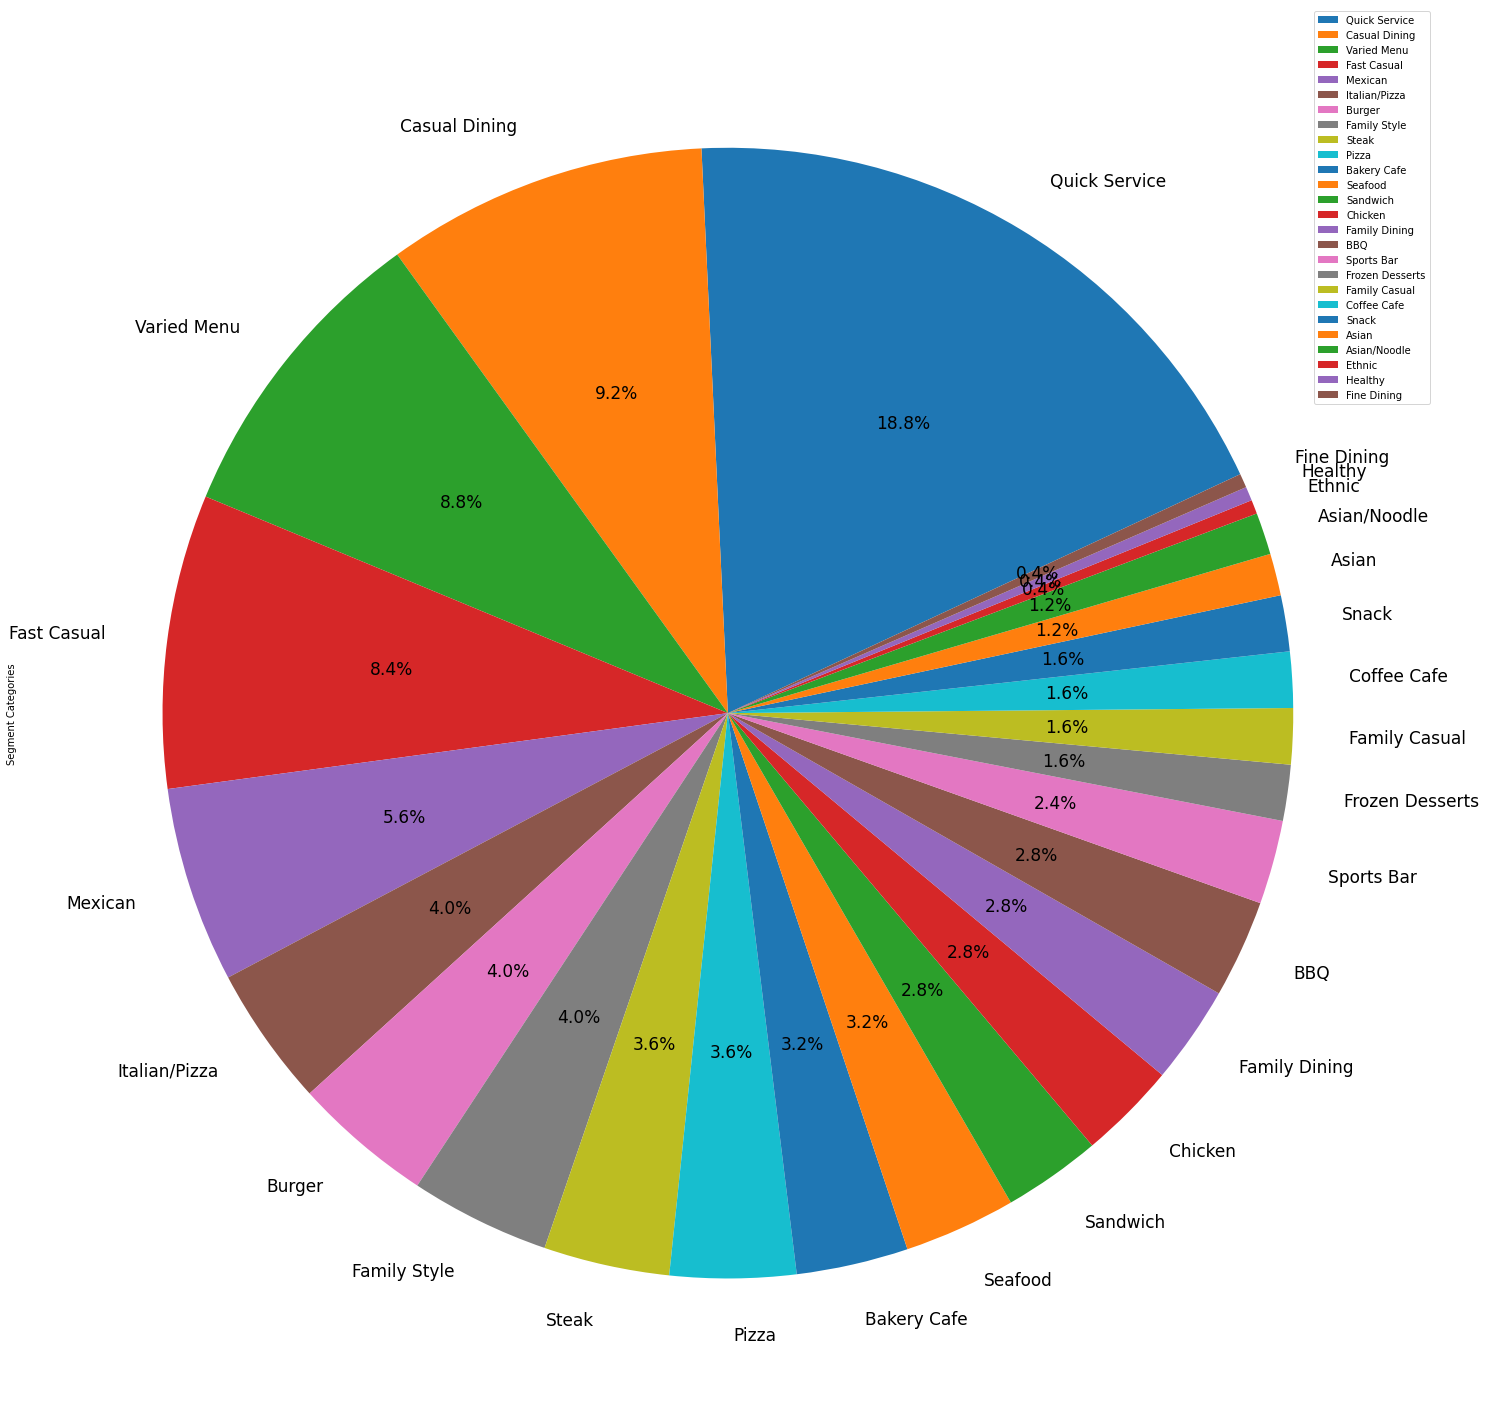

In [36]:
vis1 = pd.DataFrame(a)
plot1 = vis1.plot.pie(y ='Segment_Category_1', autopct='%1.1f%%', label = "Segment Categories", fontsize=17, startangle = 25, figsize=(26, 26))

### Line chart describing the amount of sales and units of the top 250 restaurants indicated in the dataset

Text(0, 0.5, 'Sales and Units')

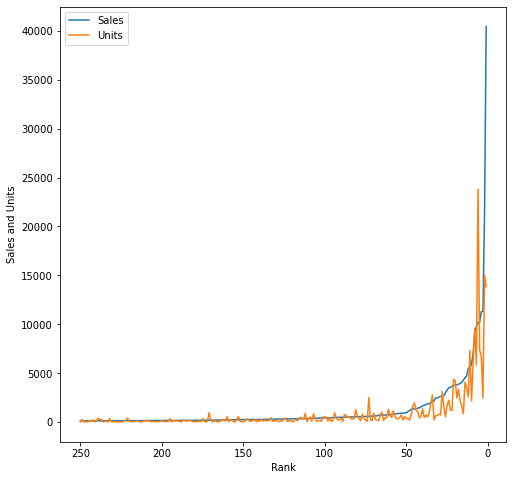

In [51]:
vis2 = pd.DataFrame(rest_df)
plot2 = vis2.plot.line(x = 'Rank', y = ['Sales', 'Units'], figsize=(8, 8))
plot2.invert_xaxis()
plot2.set_ylabel('Sales and Units')